<a href="https://colab.research.google.com/github/ortra/myrepo/blob/main/Math_for_DS_and_SP_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathematical Method for DS and PS
## HW 1 - Question 5

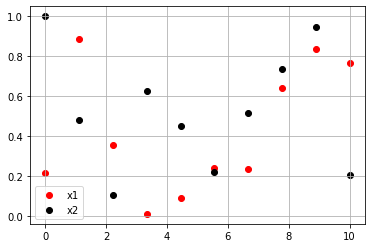

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Draw 2 random signals x1, x2 with dimention p

p = 10

multi = 1

x1 = multi*np.random.rand(1,p)
x2 = multi*np.random.rand(1,p)

x = np.linspace(0,p,p)

plt.scatter(x, x1.transpose(), c='r', label='x1')
plt.scatter(x, x2.transpose(), c='k', label='x2')

plt.grid()
plt.legend()

plt.show()

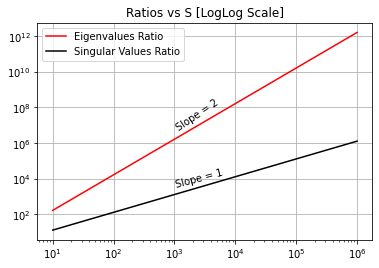

In [143]:
# Generate n observations of y

Y = []
n = 1000 # observations
mu = 0
sig = 1

a = np.random.normal(mu, sig, size = (n,1))
b = np.random.normal(mu, sig, size = (n,1))

pts = n//p
S = np.array(np.logspace(1,6,num=pts))
eigen_ratio = np.zeros(pts)
sing_ratio = np.zeros(pts)

for i,s in enumerate(S):
  
  Y = s * a.dot(x1) + b.dot(x2)
  
  # Covariance, Eigenvalues, Singular Values
  covar = np.cov(Y, rowvar = False)
  eigen_vals = np.sort(np.linalg.eigvals(covar))[::-1]
  sing_vals = np.linalg.svd(Y, compute_uv=False)
  
  # Ratio No.1
  eigen_ratio[i] = eigen_vals.real[0] / eigen_vals.real[1]

  # Ratio No.2
  sing_ratio[i] = sing_vals[0] / sing_vals[1]


plt.loglog(S, eigen_ratio, 'r', label='Eigenvalues Ratio')
plt.loglog(S, sing_ratio, 'k', label='Singular Values Ratio')


slope1, intercept1 = np.polyfit(np.log(S), np.log(eigen_ratio), 1)
slope2, intercept2 = np.polyfit(np.log(S), np.log(sing_ratio), 1)

plt.text(10e2, 0.4*10e7, "Slope = %.0f" %slope1, size=10, rotation=17*slope1,
         ha="left", va="center")

plt.text(10e2, 10e3, "Slope = %.0f" %slope2, size=10, rotation=15*slope2,
         ha="left", va="center")

plt.title('Ratios vs S [LogLog Scale]')
plt.grid()
plt.legend()
plt.show()




In [ ]:
print(f'x1: {x1.shape}')
print(f'x2: {x2.shape}')
print(f'S: {S.shape}')
print(f'a: {a.shape}')
print(f'b: {b.shape}')
print(f'Y: {Y.shape}')
print(f'Cov: {covar.shape}')  
print(f'eig_val: {eigen_vals.shape}')
print(f'sing_vals: {sing_vals.shape}')

1. We can see that the slope of the ratio of the eigenvalues is 2 times greater than the ratio of the singular values. This result makes sense because a singular value is also known as the positive square root of the eigenvalue. Since our graph is on a logarithmic scale, this square root is represented as a multiple of 2.

2. The eigenvalues are very large and could be affected by numerical errors, so that it will be better to use the SVD.

  **Note** that the slopes of the graphs are rounded but very close to the values represented.

## HW 1 - Question 6 - A

In [206]:
import numpy as np

def marchenko_pastur_mu(x, gamma, sigma2=1):
    x = np.atleast_1d(x).astype(float)
    gamma_p = sigma2 * (1 + np.sqrt(gamma)) ** 2
    gamma_m = sigma2 * (1 - np.sqrt(gamma)) ** 2
    mu = np.zeros_like(x)
    is_nonzero = (gamma_m < x) & (x < gamma_p)
    x_valid = x[is_nonzero]
    factor = 1 / (2 * np.pi * sigma2 * gamma)
    mu[is_nonzero] = factor / x_valid
    mu[is_nonzero] *= np.sqrt((gamma_p - x_valid) * (x_valid - gamma_m))
    if gamma > 1:
        mu[x == 0] = 1 - 1 / gamma
    return mu

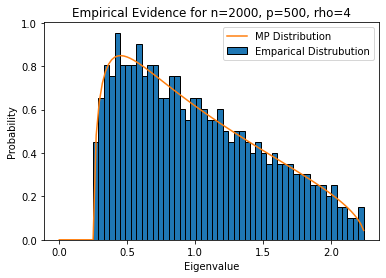

In [208]:
import numpy as np

p = 500   # feature length
n = 2000  # examples (observations)

mu = np.asarray([0] * p)
I = np.identity(p)

X = np.random.multivariate_normal(mu, I, size=n)

covar = np.cov(X, rowvar=False)
eigen = np.sort(np.linalg.eigvals(covar)).real
x_axis = np.linspace(0, np.max(eigen), 100)

plt.hist(eigen, 50, density=True, edgecolor='k', label='Emparical Distrubution')
plt.plot(x_axis, marchenko_pastur_mu(x_axis, gamma=p/n), label='MP Distribution')

plt.grid(False)
plt.legend()
plt.title('Empirical Evidence for n={}, p={}, rho={}'.format(n,p,n//p))
plt.xlabel('Eigenvalue')
plt.ylabel('Probability')

plt.show()


## HW 1 - Question 6 - B

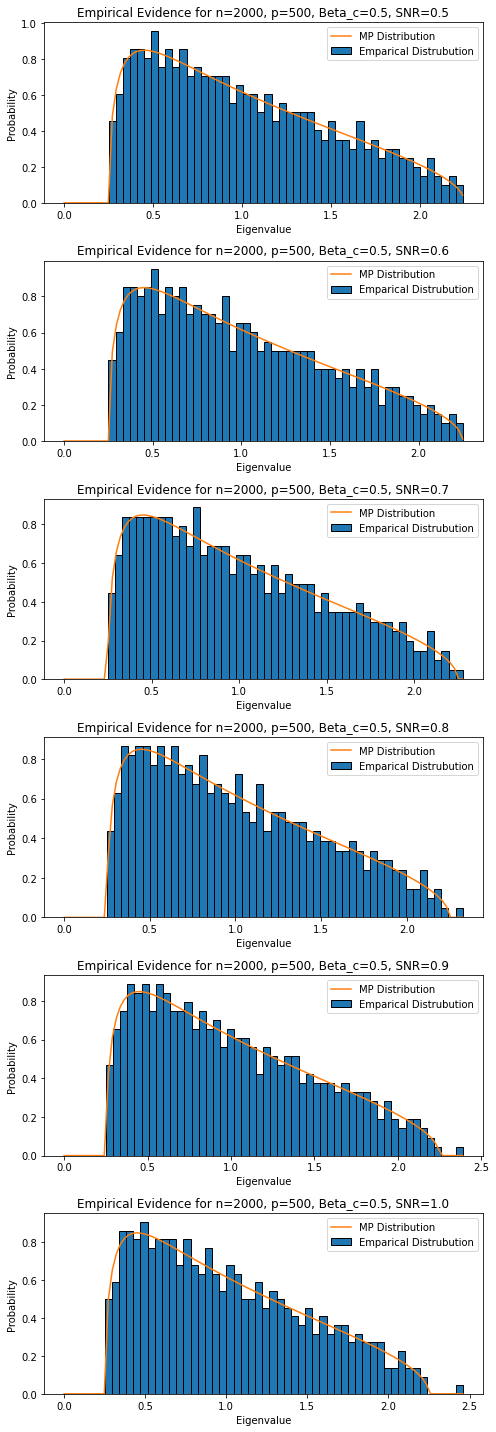

In [280]:
n, p = 2000, 500

beta_c = np.sqrt(p/n)

Beta = np.linspace(beta_c,1,6)

fig, ax = plt.subplots(len(Beta), figsize=(7, 20))

g = np.random.normal(0, 1, [1, n])
g = np.tile(g, (p, 1))
g0 = np.random.normal(0, 1, [p, n])
u = np.random.normal(0, 1, [p, 1])
u = u / np.linalg.norm(u)
u_n = np.tile(u, (1, n))

for i,beta in enumerate(Beta):

  X_spike = np.sqrt(beta) * g * u + g0
  X_spike = X_spike.T

  covar_spike = np.cov(X_spike, rowvar=False)
  eigen_spike = np.sort(np.linalg.eigvals(covar_spike))

  x_axis = np.linspace(0, np.max(eigen_spike), 100)



  ax[i].hist(eigen_spike, 50, density=True, edgecolor='k', label='Emparical Distrubution')
  ax[i].plot(x_axis, marchenko_pastur_mu(x_axis, gamma=p/n), label='MP Distribution')

  ax[i].grid(False)
  ax[i].legend()
  ax[i].set_title('Empirical Evidence for n={}, p={}, Beta_c={}, SNR={}'.format(n,p,beta_c,beta))
  ax[i].set_xlabel('Eigenvalue')
  ax[i].set_ylabel('Probability')

plt.tight_layout()
plt.show()



1. The minimal SNR (β) value which we can see the signal is ~0.7-0.8 which is greater that the theorical value (βc) that we expecterd to see in the theorical case and this is probably because in our case n is not infinity.